In [1]:
import pandas as pd
titanic_df = pd.read_csv("titanic-passengers.csv",sep=";")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [3]:
titanic_df.isnull().sum().sum()

866

In [4]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
print(titanic_df["Age"].mean())
titanic_df["Age"].fillna(titanic_df["Age"].mean(),inplace=True)
titanic_df["Age"].isnull().sum()

print(titanic_df["Cabin"].value_counts()) #looking for the most freq value


29.69911764705882
G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
              ..
C91            1
D45            1
F G63          1
A34            1
E63            1
Name: Cabin, Length: 147, dtype: int64


In [6]:
titanic_df["Cabin"].fillna("G6",inplace=True) #replacing the missing value with G6

In [7]:
titanic_df["Cabin"].isnull().sum() #checking the missing values

0

In [8]:
print(titanic_df["Embarked"].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [9]:
titanic_df["Embarked"].fillna("S",inplace=True) #replacing the missing value in Embarked
titanic_df["Embarked"].isnull().sum()

0

In [10]:
data=titanic_df

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,G6,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,G6,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,G6,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


<AxesSubplot:>

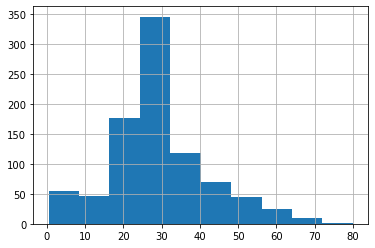

In [12]:
import matplotlib.pyplot as plt
data["Age"].hist()

<AxesSubplot:>

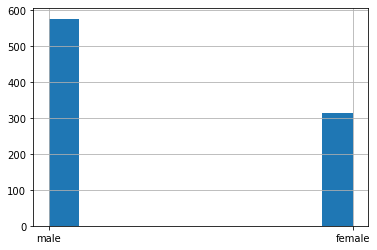

In [13]:
data["Sex"].hist()

<AxesSubplot:title={'center':'distrubution'}, xlabel='Age', ylabel='Sex'>

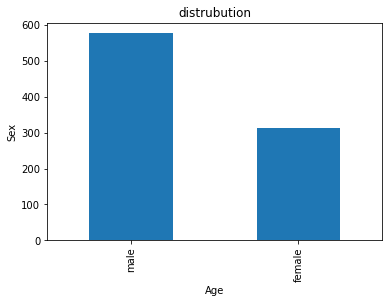

In [14]:
plt.xlabel("Age")
plt.ylabel("Sex")
plt.title("distrubution")
vc=titanic_df['Sex'].value_counts()
vc.plot.bar(rot=90)

3    491
1    216
2    184
Name: Pclass, dtype: int64


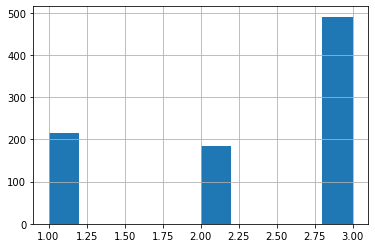

In [15]:

data["Pclass"].hist()
s=data["Pclass"].value_counts()
print(s)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

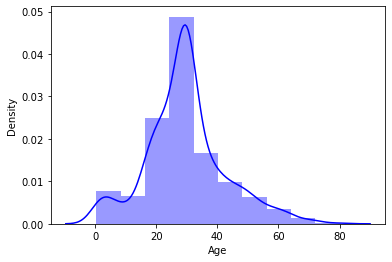

In [16]:
import seaborn as sns
sns.distplot(titanic_df["Age"],bins=10,hist=True,kde=True,color="blue")

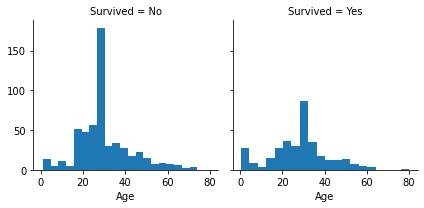

In [17]:
g=sns.FacetGrid(titanic_df,col='Survived')
g.map(plt.hist,'Age',bins=20)

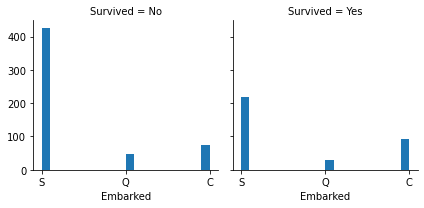

In [18]:
g=sns.FacetGrid(titanic_df,col='Survived')
g.map(plt.hist,'Embarked',bins=20)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.339009


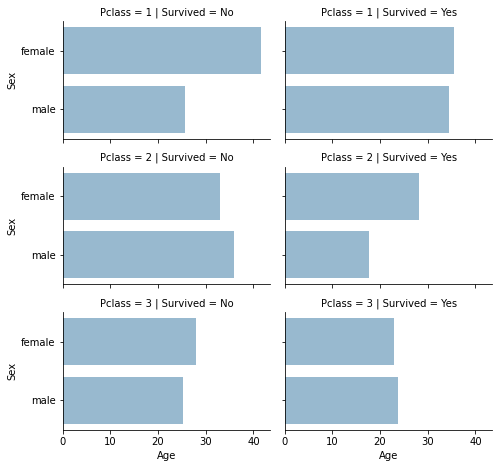

In [19]:
grid = sns.FacetGrid(titanic_df, row="Pclass", col="Survived", size=2.2, aspect=1.6)
grid.map(sns.barplot, "Age", "Sex",alpha=.5, ci=None)

cleanup={"Survived":{"Yes":1, "No": 0}}  # at first, let's convert Promoted to numerical format
titanic_df.replace(cleanup, inplace=True)
titanic_df[["Embarked", "Survived"]].groupby(["Embarked"], as_index=True).mean()

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked
0,0,2,"Collander, Mr. Erik Gustaf",male,28.0,13.0000,G6,S
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,7.6500,F G73,S
2,0,3,"Jensen, Mr. Hans Peder",male,20.0,7.8542,G6,S
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,21.0750,G6,S
4,0,1,"Davidson, Mr. Thornton",male,31.0,52.0000,B71,S


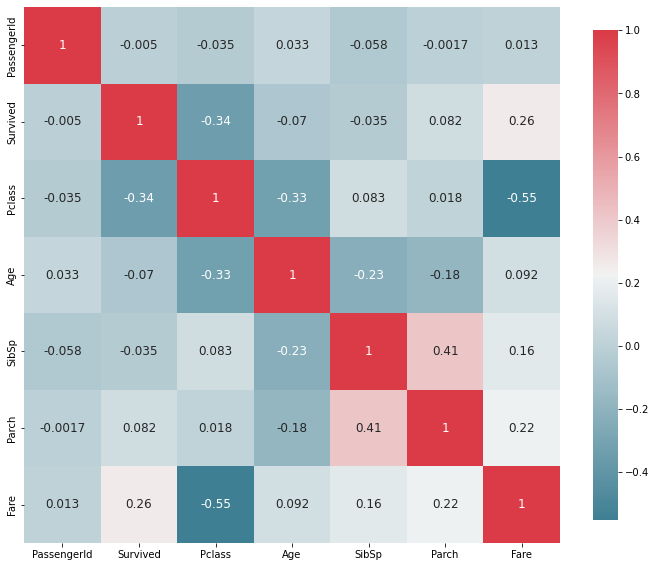

In [20]:
import matplotlib.pyplot as plt
def plot_correlation_map( df ):

    corr = df.corr()
  
    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(corr, cmap = cmap, square=True, cbar_kws={ 'shrink' : .9 }, ax=ax,  annot = True, annot_kws = { 'fontsize' : 12 } )
plot_correlation_map(titanic_df)

new_df=titanic_df.drop(["PassengerId","SibSp","Parch","Ticket",],axis=1)
new_df.head()

<AxesSubplot:xlabel='Pclass'>

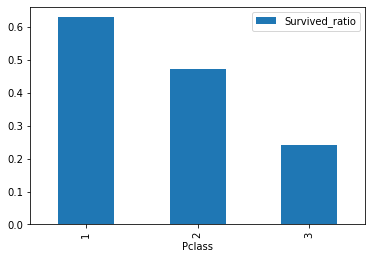

In [39]:
data.groupby(by="Pclass").agg(Survived_ratio=("Survived","mean")).plot(kind='bar')

In [21]:
new_df['Title'] =new_df['Name'].str.split(',|\\.',expand = True)[1] 
new_df['Title'] =new_df['Title'].str.strip()
new_df['Title'].value_counts()



Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Don               1
Lady              1
Jonkheer          1
Mme               1
Sir               1
Capt              1
the Countess      1
Ms                1
Name: Title, dtype: int64

<AxesSubplot:xlabel='Title'>

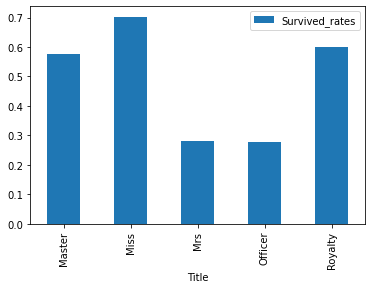

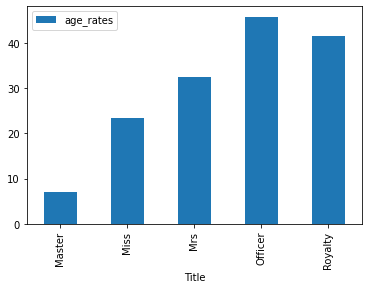

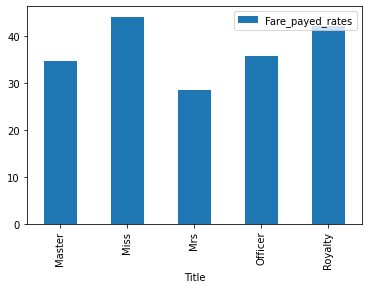

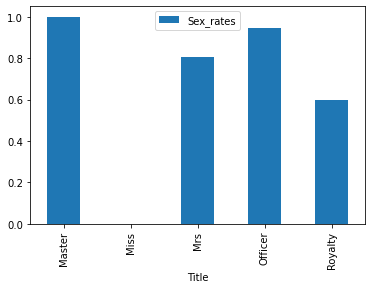

In [41]:
new_df.groupby(by="Title").agg(Survived_rates=("Survived","mean")).plot(kind='bar') 
new_df.groupby(by="Title").agg(age_rates=("Age","mean")).plot(kind='bar')   
new_df.groupby(by="Title").agg(Fare_payed_rates=("Fare","mean")).plot(kind='bar')    
new_df.groupby(by="Title").agg(Sex_rates=("Sex","mean")).plot(kind='bar')

In [22]:
import pandas as pd
import numpy as np
dict={

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",

                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess": "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }

new_df['Title'] =new_df['Title'].map(dict)

In [23]:
new_df

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",male,28.000000,13.0000,G6,S,Mrs
1,0,3,"Moen, Mr. Sigurd Hansen",male,25.000000,7.6500,F G73,S,Mrs
2,0,3,"Jensen, Mr. Hans Peder",male,20.000000,7.8542,G6,S,Mrs
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.000000,21.0750,G6,S,Mrs
4,0,1,"Davidson, Mr. Thornton",male,31.000000,52.0000,B71,S,Mrs
...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,30.0708,G6,C,Mrs
887,0,3,"Sirayanian, Mr. Orsen",male,22.000000,7.2292,G6,C,Mrs
888,0,3,"Cacic, Miss. Marija",female,30.000000,8.6625,G6,S,Miss
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,29.699118,7.8958,G6,S,Mrs


In [24]:
new_df['Title'].value_counts()

Mrs        643
Miss       185
Master      40
Officer     18
Royalty      5
Name: Title, dtype: int64

In [35]:
cleanup_nums={ "Survived" : {"No":0,"Yes":1}}
new_df.replace(cleanup_nums,inplace=True)
new_df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [36]:


cleanup_nums={ "Sex" : {"female":0,"male":1}}
new_df.replace(cleanup_nums,inplace=True)
new_df["Sex"].value_counts()


1    577
0    314
Name: Sex, dtype: int64

In [37]:
new_df

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Title
0,0,2,"Collander, Mr. Erik Gustaf",1,28.000000,13.0000,G6,S,Mrs
1,0,3,"Moen, Mr. Sigurd Hansen",1,25.000000,7.6500,F G73,S,Mrs
2,0,3,"Jensen, Mr. Hans Peder",1,20.000000,7.8542,G6,S,Mrs
3,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",0,29.000000,21.0750,G6,S,Mrs
4,0,1,"Davidson, Mr. Thornton",1,31.000000,52.0000,B71,S,Mrs
...,...,...,...,...,...,...,...,...,...
886,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,30.0708,G6,C,Mrs
887,0,3,"Sirayanian, Mr. Orsen",1,22.000000,7.2292,G6,C,Mrs
888,0,3,"Cacic, Miss. Marija",0,30.000000,8.6625,G6,S,Miss
889,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",1,29.699118,7.8958,G6,S,Mrs


<AxesSubplot:xlabel='Title'>

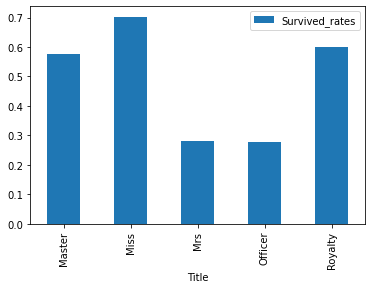

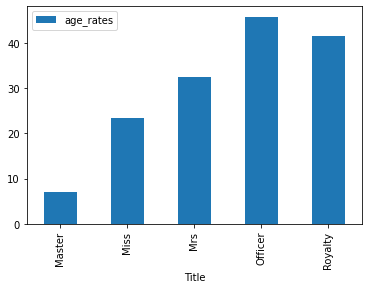

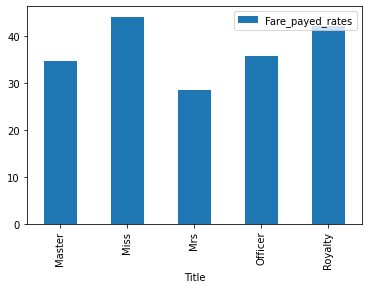

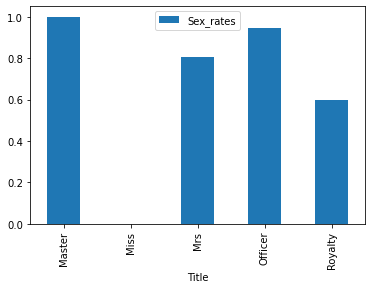

In [38]:


new_df.groupby(by="Title").agg(Survived_rates=("Survived","mean")).plot(kind='bar') 
new_df.groupby(by="Title").agg(age_rates=("Age","mean")).plot(kind='bar')   
new_df.groupby(by="Title").agg(Fare_payed_rates=("Fare","mean")).plot(kind='bar')    
new_df.groupby(by="Title").agg(Sex_rates=("Sex","mean")).plot(kind='bar')

In [43]:
new_df["FamilySize"] = data["Parch"] + data["SibSp"]

<AxesSubplot:xlabel='FamilySize'>

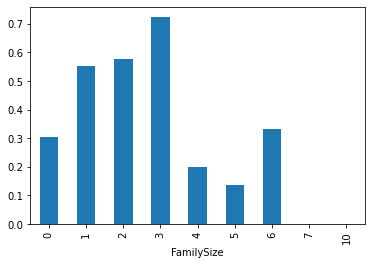

In [44]:
new_df['Survived'].groupby(data['FamilySize']).mean().plot(kind='bar')